In [1]:
import numpy as np 
import matplotlib as mat
import pandas as pd


In [2]:
dataset = pd.read_csv("suv_data.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
import seaborn as sns

<Axes: xlabel='Purchased', ylabel='count'>

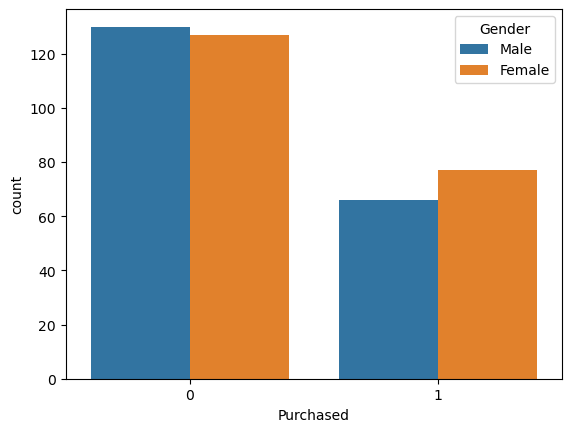

In [5]:
sns.countplot(x='Purchased',data=dataset,hue='Gender')

<Axes: xlabel='Age', ylabel='Purchased'>

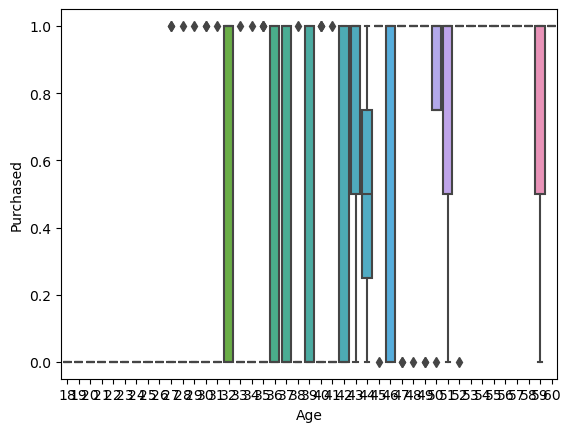

In [6]:
sns.boxplot(x='Age',y='Purchased',data=dataset)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
gender = pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
gender

,Male
0,True
1,True
2,False
3,False
4,True
...,...
395,False
396,True
397,False
398,True


In [11]:
gender = gender.astype(int)

In [12]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [13]:
dataset=pd.concat([dataset,gender],axis =1)

In [14]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [15]:
X = dataset.iloc[:,[2,3,5]]

In [16]:
X

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [17]:
Y = dataset.iloc[:,4]

In [18]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

In [22]:
X_train

,Age,EstimatedSalary,Male
294,35,57000,0
272,60,42000,1
260,35,77000,0
249,35,97000,0
343,47,51000,0
...,...,...,...
365,59,29000,0
106,26,35000,0
227,56,133000,1
201,49,74000,1


In [23]:
y_train

294    0
272    1
260    0
249    1
343    1
      ..
365    1
106    0
227    1
201    0
394    0
Name: Purchased, Length: 320, dtype: int64

In [24]:
logreg_model = LogisticRegression(random_state=6)

In [25]:
logreg_model.fit(X_train,y_train)

LogisticRegression(random_state=6)

In [26]:
predictions=logreg_model.predict(X_test)

In [27]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_test

137    1
138    0
13     0
95     0
175    0
      ..
209    0
223    1
90     0
286    0
140    0
Name: Purchased, Length: 80, dtype: int64

In [29]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 80 entries, 137 to 140
Series name: Purchased
Non-Null Count  Dtype
--------------  -----
80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [30]:
from sklearn.metrics import classification_report

In [31]:
classification_report(y_test,predictions)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.65      1.00      0.79        52\n           1       0.00      0.00      0.00        28\n\n    accuracy                           0.65        80\n   macro avg       0.33      0.50      0.39        80\nweighted avg       0.42      0.65      0.51        80\n'

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,predictions)

array([[52,  0],
       [28,  0]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score


In [35]:
accuracy = accuracy_score(y_test,predictions)

In [36]:
accuracy

0.65

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[-0.25596993, -0.35191452, -0.96922337],
       [ 2.0843266 , -0.81031064,  1.03175391],
       [-0.25596993,  0.2592803 , -0.96922337],
       [-0.25596993,  0.87047513, -0.96922337],
       [ 0.8673724 , -0.53527297, -0.96922337],
       [ 1.24181985, -1.39094572,  1.03175391],
       [-1.09847669, -1.6048639 ,  1.03175391],
       [-0.91125296, -1.11590805,  1.03175391],
       [ 2.0843266 ,  1.20663228, -0.96922337],
       [ 1.52265543,  0.04536212,  1.03175391],
       [-0.44319366, -0.84087038, -0.96922337],
       [-0.3495818 ,  0.1064816 , -0.96922337],
       [ 0.02486565, -0.22967555,  1.03175391],
       [-1.00486483,  0.83991538, -0.96922337],
       [ 0.3993131 ,  0.35095953, -0.96922337],
       [ 1.89710288, -0.9325496 , -0.96922337],
       [-1.09847669, -1.57430416, -0.96922337],
       [ 1.33543171,  2.4901414 ,  1.03175391],
       [-0.06874621, -1.0853483 , -0.96922337],
       [ 0.30570124,  0.1064816 , -0.96922337],
       [ 0.77376054, -1.11590805, -0.969

In [39]:
X_test

array([[-0.76708043,  0.83941   ,  0.97530483],
       [-0.97616539, -0.40608243, -1.02532046],
       [-0.55799548, -1.46994054,  0.97530483],
       [-0.24436804, -0.79529881, -1.02532046],
       [-1.49887778, -1.21046295, -1.02532046],
       [-0.03528309,  0.47614138, -1.02532046],
       [-1.49887778, -0.69150777, -1.02532046],
       [ 0.27834435, -0.35418691,  0.97530483],
       [ 0.4874293 ,  0.00908172, -1.02532046],
       [-0.03528309, -0.56176898,  0.97530483],
       [-0.13982556, -0.58771674,  0.97530483],
       [ 0.4874293 ,  1.92921587,  0.97530483],
       [ 0.38288683,  0.13882051, -1.02532046],
       [-0.24436804, -0.95098536,  0.97530483],
       [-1.18525034,  0.13882051, -1.02532046],
       [ 0.27834435,  0.00908172, -1.02532046],
       [ 0.38288683, -0.38013467, -1.02532046],
       [-0.55799548,  1.09888759, -1.02532046],
       [ 0.90559922,  0.11287275,  0.97530483],
       [-0.87162291,  1.90326812,  0.97530483],
       [ 2.05556647, -1.26235847, -1.025

In [40]:
y_train

294    0
272    1
260    0
249    1
343    1
      ..
365    1
106    0
227    1
201    0
394    0
Name: Purchased, Length: 320, dtype: int64

In [82]:
logreg_model.fit(X_train,y_train)

LogisticRegression(random_state=6)

In [84]:
predictions2=logreg_model.predict(X_test)

In [86]:
predictions2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
y_test

137    1
138    0
13     0
95     0
175    0
      ..
209    0
223    1
90     0
286    0
140    0
Name: Purchased, Length: 80, dtype: int64

In [90]:
confusion_matrix(predictions2,y_test)

array([[49, 10],
       [ 3, 18]], dtype=int64)

In [92]:
accuracy2=accuracy_score(y_test,predictions2)

In [96]:
accuracy2*100

83.75

In [100]:
print('Accuracy of the model is:',accuracy2*100,'%')

Accuracy of the model is: 83.75 %


## End

In [11]:
print("end of code")

end of code
